# [Swarm behavior on the Grid](https://ecosystem.siemens.com/techforsustainability/swarm-behaviour-on-the-grid/overview)

### Siemens sustainability challenge

----

# Model demonstration

import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import load_data, plot_date


%matplotlib inline
pd.set_option('display.max_columns', 500)
sns.set_context('talk', font_scale=1.2)
sns.set_palette('Set1')

## Section 1: data 

### **PJM Hourly Energy Consumption Data**
Dataset: [kaggle link](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption)

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

Raw data have a range of [issues](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption/discussion/175795?select=pjm_hourly_est.csv&sort=votes). A Kaggle user prepared this [gist](https://gist.github.com/ioanpier/e231b22bb9f705ef6280c8b73e40b4a1) for data cleaning which we use here (`process_missing_and_duplicate_timestamps`).

In [3]:
df = load_data('data/DEOK_hourly.csv', max_lag=None, rolling_mean_size=None)

### Data exploration

#### Long term consumption curve

lets look at the low-frequency variation in the data, related to the seasons

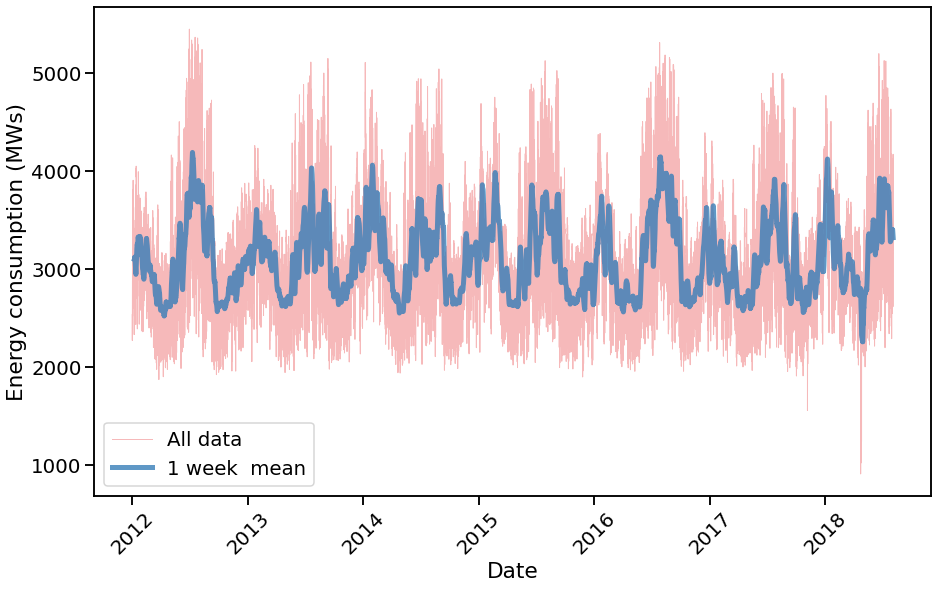

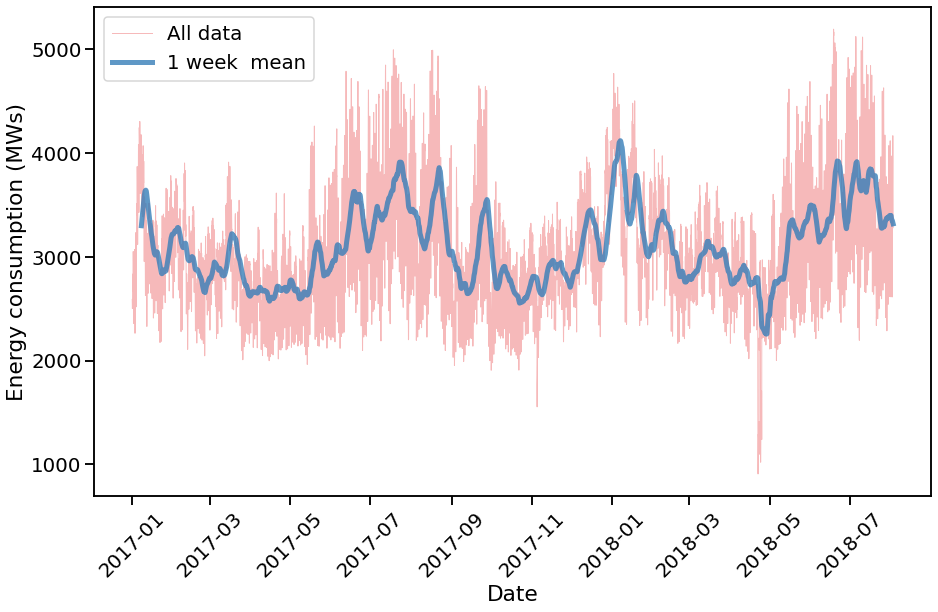

In [4]:

for df_tmp in [df, df.query('index > 2017')]:
        fig, ax = plt.subplots(figsize=(15, 9))
        ax.plot(df_tmp['MW'], label='All data', lw=1, color = 'C0', alpha = 0.3)
        ax.plot(
                df_tmp['MW'].rolling(24*7).mean(), color='C1',
                label='1 week  mean', zorder=3, alpha = 0.8, lw = 5,
                )
        ax.legend()
        ax.set_ylabel('Energy consumption (MWs)')
        ax.set_xlabel('Date')
        plt.xticks(rotation=45)


        plt.show()

#### High frequency consumption curve - related to daily routines and day/night cycle.

Explore January 2016

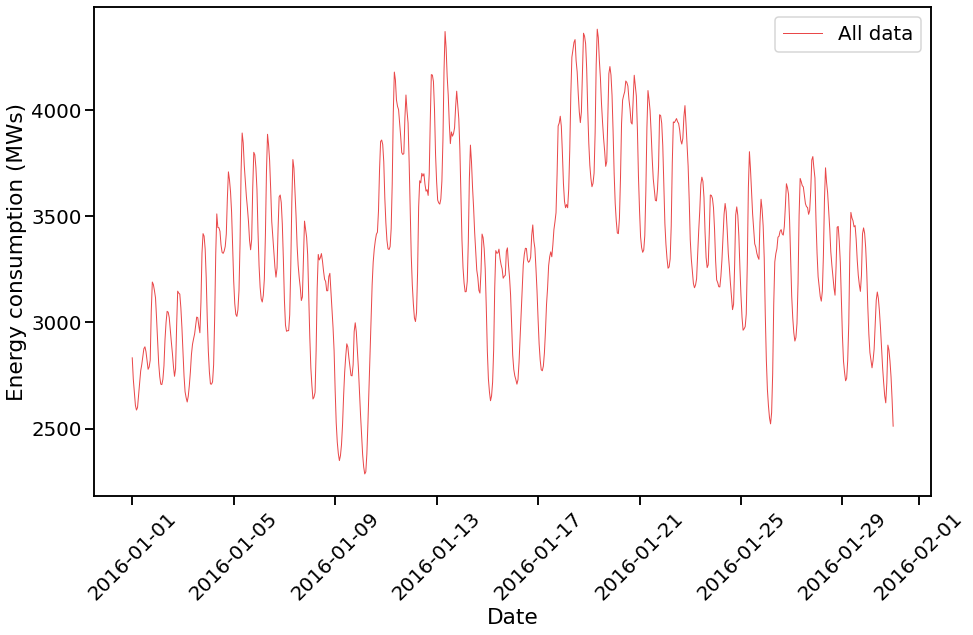

In [5]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df[(df.index>='2016-01-01') & (df.index<='2016-01-31')]['MW'], label='All data', lw=1, color = 'C0', alpha = 0.8)
ax.legend()
ax.set_ylabel('Energy consumption (MWs)')
ax.set_xlabel('Date')
#rotate xticks
plt.xticks(rotation=45)
plt.show()

Explore the average of many days in a few particular years (2013, 2015 and 2017) grouped by month.

We can see significant difference between daily patterns in February and December. Although day-to-day variance is large.

This is an example of unexpected behaviour. We will try finding this kind of events in the data.

Text(0.5, 1.05, 'Average daily energy consumption by month for years 2013, 2015 and 2017')

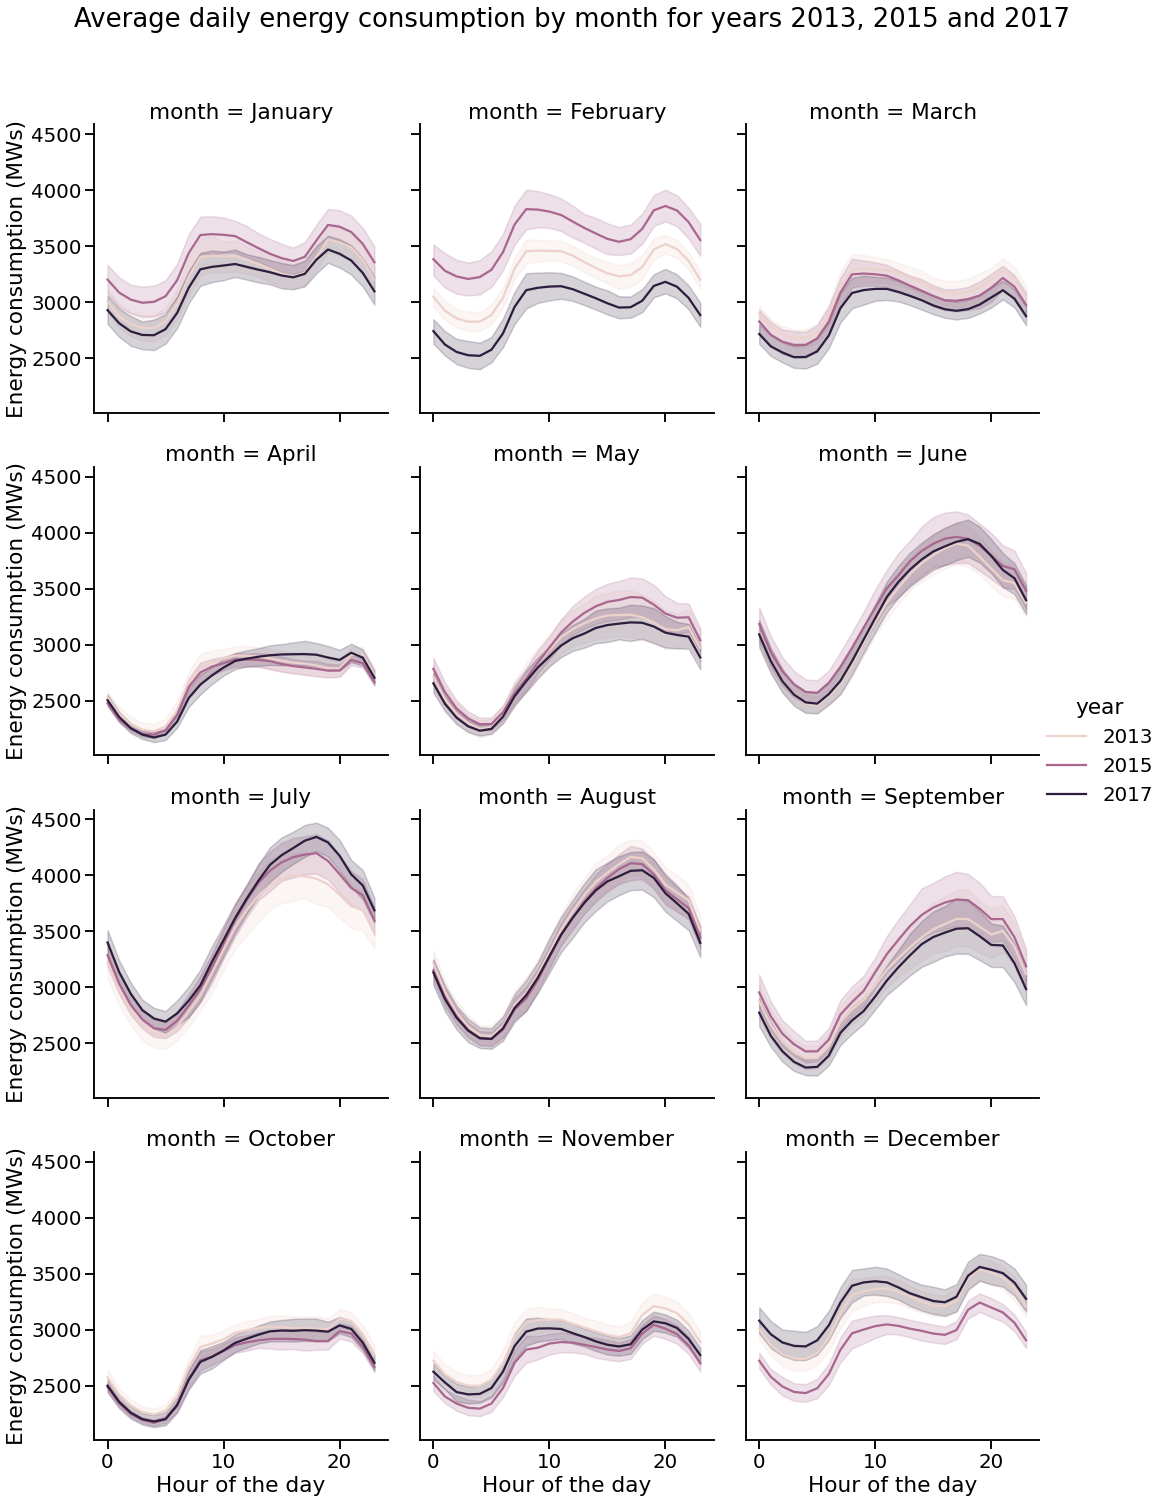

In [25]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

fg = sns.relplot(data=df.query('year in [2013, 2015, 2017]'), x='hour', y='MW', kind='line', hue = 'year', col = 'month', col_wrap = 3, height = 5, aspect = 1)

fg.set_axis_labels('Hour of the day', 'Energy consumption (MWs)')
fg.fig.suptitle('Average daily energy consumption by month for years 2013, 2015 and 2017', y = 1.05)

We will proceed to the next notebook to build a simple model for this kind of data and find differences between our expectations and the data.